In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#first all the states are assigned 0 value function
#the we apply bellmann optimality equation, i.e.
# v(s)=max over all actions(sum over all states possible in that action( p(s,a,s')*( r(s,a,s') + Y*V(s') ) ))

In [97]:
value_list=np.zeros(10)
x=open("episodic-mdp-10-5.txt")
for a in x:
    print(a)

numStates 10

numActions 5

start 6

end 0 5

transition 1 0 6 -0.37970486136133474 0.04933586337760911

transition 1 0 5 0.4596634965202573 0.1722011385199241

transition 1 0 3 0.797676575935987 0.21110056925996204

transition 1 0 8 0.36796786383088254 0.15370018975332067

transition 1 0 9 -0.055714569094573285 0.41366223908918404

transition 1 1 1 -0.8134562712951798 0.8329519450800915

transition 1 1 9 0.6801824331108262 0.16704805491990846

transition 1 2 6 -0.5227681427695596 0.06252382767823103

transition 1 2 4 0.9350805005802867 0.170987418985894

transition 1 2 3 0.6063589385597401 0.09931376286694625

transition 1 2 0 -0.10406085712885926 0.18223408311094166

transition 1 2 9 -0.8391083628949292 0.48494090735798706

transition 1 3 9 0.9276770919476018 1.0

transition 1 4 2 -0.419340995194484 0.2592986184909671

transition 1 4 5 -0.6212173428912877 0.03772582359192349

transition 1 4 1 -0.6265409434888898 0.048884165781083955

transition 1 4 6 0.22554635973721338 0.36981934112

In [98]:
x=open("episodic-mdp-10-5.txt")
y=1
for a in x:
    a=a.strip(" ")
    a=a.strip("\n")
    if "numStates" in a:
        a=a.strip("numStates ")
        ns=eval(a)
    elif "numActions" in a:
        a=a.strip("numActions ")
        na=eval(a)
        reward=np.zeros((ns,ns,na))
        prob=np.zeros((ns,ns,na))
    elif "start" in a:
        a=a.strip("start ")
        start_state=eval(a)
    elif "end" in a:
        a=a.strip("end ")
        a=a.replace(" ","")
        end_states=list(a)
    elif "transition" in a:
        a=a.strip("transition ")
        for i in range(ns):
            for j in range(ns):
                for k in range(na):
                    if y==1 and i==eval(a[0]) and j==eval(a[4]) and k==eval(a[2]):
                        a=a.strip(a[0:6:1])
                        l=a.find(" ")
                        reward[i][j][k]=eval(a[:l:1])
                        prob[i][j][k]=eval(a[l+1::1])
                        y=0
        y=1
    elif "discount" in a:
        Y=eval(a.strip("discount "))

In [99]:
print(ns)
print(na)
print(reward[9][7][3])
print(reward[0][0][0])
#print(reward)

10
5
-0.7086191560928488
0.0


In [100]:
# if i am in state s, and ation a is to be considered ,then i will check prob[s][s'][a](r[s][s'][a]+Y*v[s])

In [114]:
g=[]
value_list=np.zeros(ns)
action_value_list=np.zeros(ns)
for d in range(4000):
    sum_v=0
    l=[]
    for s in range(ns):
        if s not in end_states:
            for a in range(na):
                for j in range(ns):
                    sum_v=sum_v+prob[s][j][a]*(reward[s][j][a]+Y*value_list[j])
                l.append(sum_v)
                sum_v=0
            value_list[s]=max(l)
            action_value_list[s]=l.index(max(l))
            l=[]
    g.append(value_list[1])

0.0
500.3924721661395
500.6863236058101
475.0398430445621
443.28237441911637
0.0
497.13618486671317
488.66929785945695
333.97070142225
499.466822500475


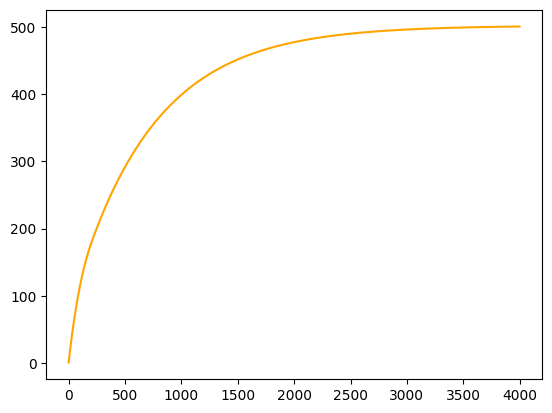

In [115]:
for i in value_list:
    print(i)
plt.plot(np.arange(4000),g,color="orange")
plt.show()

In [117]:
c=open("sol-episodic-mdp-10-5.txt")
j=0
for i in c: 
    i=i.strip(" ")
    i=i.strip("\n")
    l=i.find(" ")
    print(eval(i[:l:])-value_list[j])
    print(action_value_list[j]==eval(i[l+1::]))
    j=j+1

0.0
True
29.827349833860524
True
29.82735039418992
True
29.75880395543794
True
29.66569058088362
True
0.0
True
29.81680713328683
True
29.795016140542998
True
20.486978577749994
True
29.825322499524987
True
